In [2]:
import pandas as pd
data=pd.read_csv('../DataFP/dataOK.csv')
import matplotlib.pyplot as plt

C:\Users\garciaer\AppData\Local\Temp\ipykernel_11468\3727968501.py:2: DtypeWarning: Columns (4,5,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../DataFP/dataOK.csv')


In [105]:
#Checking size of my data
#datasize= pd.read_csv(data, sep=",")
#Print the first 5 rows of the dataOK
print(len(data))

253992


In [3]:
#Checking the content of my data file
columns = list(data.columns)

#Extracting just the data I will work on, menaning the values of Sr, Nd and Pb
columnSrNd= ['sr87_sr86','nd143_nd144']
dataSrNd= data[columnSrNd].dropna()
dataSrNd.to_csv('../DataFP/dataSrNd.csv')

columnPb= ['pb206_pb204','pb207_pb204']
dataPb = data[columnPb].dropna()
dataPb.to_csv('../DataFP/dataPb.csv')


In [45]:
#Calculating the middle point of the End_members mantle source fields for labeling, values based on Winter's book, page 269, Table 5, Figure 8 and Figure 9. 

#middle point of the DM field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_DM = (0.7015 + 0.7025) / 2
Nd_DM = (0.51325 + 0.5136) / 2
mp_DM_SrNd= [Sr_DM, Nd_DM]

#middle point of the DM field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_DM = (15.5+17.7) / 2
#Pb7_DM = (15.35+15.45) / 2
#mp_DM_Pb= [Pb6_DM, Pb7_DM]
#________________________________________
#middle point of the HIMU field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_HIMU = (0.7026+0.7032) / 2
Nd_HIMU = (0.51285+0.51295) / 2
mp_HIMU_SrNd= [Sr_HIMU, Nd_HIMU]

#middle point of the HIMU field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_HIMU = (21.2+21.7) / 2
#Pb7_HIMU = (15.8+15.9) / 2
#mp_HIMU_Pb= [Pb6_HIMU, Pb7_HIMU]
#________________________________________
#middle point of the EMI field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_EMI = (0.7058+0.704) / 2
Nd_EMI = (0.5123+0.5122) / 2
mp_EMI_SrNd= [Sr_EMI, Nd_EMI]

#middle point of the EMI field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_EMI = (16.5+17) / 2
#Pb7_EMI = (15.46+15.52) / 2
#mp_EMI_Pb= [Pb6_EMI, Pb7_EMI]
#________________________________________
#middle point of the EMII field in the 143Nd/144Nd versus 87Sr/86Sr plot

#no EMII field in 143Nd/144Nd versus 87Sr/86Sr plot

#middle point of the EMII field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_EMII = (18.70+19.30) / 2
#Pb7_EMII = (15.77+15.70) / 2
#mp_EMII_Pb= [Pb6_EMII, Pb7_EMII]
#________________________________________
#middle point of the BSE field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_BSE = (0.7045+0.705) / 2
Nd_BSE = (0.51268+0.51258) / 2
mp_BSE_SrNd= [Sr_BSE, Nd_BSE]

#middle point of the BSE field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_BSE = (17.7+18.3) / 2
#Pb7_BSE = (15.7+15.52) / 2
#mp_BSE_Pb= [Pb6_BSE, Pb7_BSE]
#________________________________________
#middle point of the PREMA field in the 143Nd/144Nd versus 87Sr/86Sr plot
Sr_PREMA = (0.7035+0.7034) / 2
Nd_PREMA = (0.51295+0.51301) / 2
mp_PREMA_SrNd= [Sr_PREMA, Nd_PREMA]

#middle point of the PREMA field in the 207Pb/204Pb versus 206Pb/204Pb plot
#Pb6_PREMA = (18.3+18.6) / 2
#Pb7_PREMA = (15.5+15.45) / 2
#mp_PREMA_Pb= [Pb6_PREMA, Pb7_PREMA]
#_______________________________________
ALLmpSrNd=[mp_DM_SrNd, mp_HIMU_SrNd, mp_EMI_SrNd, mp_BSE_SrNd, mp_PREMA_SrNd]

#ALLmpPb=[mp_DM_Pb, mp_HIMU_Pb, mp_EMI_Pb, mp_BSE_Pb, mp_PREMA_Pb, mp_EMII_Pb]

In [46]:
#Label my data based on the nearest end-member field. 
import pandas as pd
import numpy as np

#Label based on 143Nd/144Nd versus 87Sr/86Sr values

#Euclidean distance between two points
def distance(p1, p2):
    p1 = p1.values.tolist()
    p1[0] = float(p1[0])
    p1[1] = float(p1[1])    
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def weighted_distance(p1, p2, weight):
    p1 = p1.values.tolist()
    p1[0] = float(p1[0])
    p1[1] = float(p1[1])    
    return weight * np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

#Function to apply the distance function to each row of my data to label
def find_nearest(row, centers, weighted=False):
    if len(centers)==5:
        weights = [10,3,8,3,1]
        weights = [1/w for w in weights]
        #print('SrNd')
    elif len(centers)==6:
        weights = [5,3,2,4,1,2]
        weights = [1/w for w in weights]
        #print("Pb")
    else:
        raise ValueError("Error in find nearest")
    if weighted:
        distances= [weighted_distance(row, p, w) for p,w in zip(centers, weights)] 
    else:
        distances= [distance(row, p) for p in centers] 
    distances=np.array(distances)    
    return distances.argmin()

weighted = True

if weighted:
    #Apply the function to each row of my data to label
    labelSrNd_w = dataSrNd.apply(lambda x: find_nearest(x, ALLmpSrNd, weighted=True), axis=1)
    labelSrNd_w = labelSrNd_w.rename('labelSrNd')
    labelSrNd_w.to_csv('../DataFP/labelSrNd_w.csv',index=True)

else:
    #Apply the function to each row of my data to label
    labelSrNd = dataSrNd.apply(lambda x: find_nearest(x, ALLmpSrNd), axis=1)
    labelSrNd = labelSrNd.rename('labelSrNd')
    labelSrNd.to_csv('../DataFP/labelSrNd.csv',index=True)

print(labelSrNd_w)
print(len(labelSrNd_w))

9         2
12        2
13        2
34        2
39        2
         ..
253977    1
253978    1
253979    1
253980    1
253981    1
Name: labelSrNd, Length: 15921, dtype: int64
15921


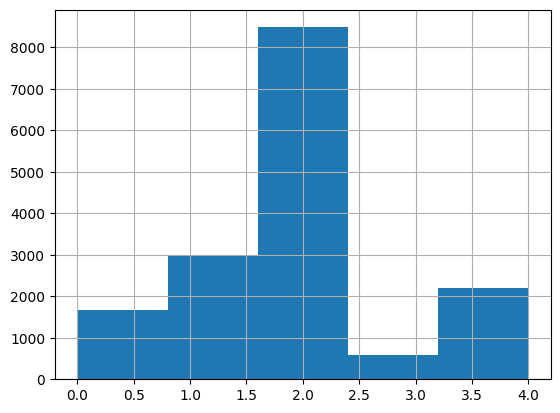

Bin 0.0 - 0.8: 1671
Bin 0.8 - 1.6: 2975
Bin 1.6 - 2.4000000000000004: 8487
Bin 2.4000000000000004 - 3.2: 595
Bin 3.2 - 4.0: 2193


In [47]:
# Histogram of end-members mantle source based on 143Nd/144Nd versus 87Sr/86Sr values
#5 mantle end-members (DM, HIMU, EMI, BSE, PREMA), no EMII
labelSrNd_w.hist(bins=5)  
plt.show()

# Assuming you have a list or array of values named 'data'
hist, bins = np.histogram(labelSrNd_w, bins=5)  # Compute histogram values

# Print the frequency/count of each bin
for i in range(len(hist)):
    print(f"Bin {bins[i]} - {bins[i+1]}: {hist[i]}")

#labelSrNd.hist(bins=5)
#plt.show()


In [ ]:
#Label based on 207Pb/204Pb versus 206Pb/204Pb values

#Function to apply the distance function to each row of my data to label
#weighted = True
#if weighted:
    #Apply the function to each row of my data to label
    #labelPb_w = dataPb.apply(lambda x: find_nearest(x, ALLmpPb, weighted=True), axis=1)
    #labelPb_w = labelPb_w.rename('labelPb')
    #labelPb_w.to_csv('../DataFP/labelPb_w.csv',index=False)

#else:
    #Apply the function created in Nd, Sr to each row of my data to label
    #labelPb= dataPb.apply(lambda x: find_nearest(x, ALLmpPb), axis=1)
    #labelPb= labelPb.rename('labelPb')
    #labelPb.to_csv('../DataFP/labelPb.csv',index=False)


In [ ]:
# Histogram of end-members mantle source based on 207Pb/204Pb versus 206Pb/204Pb values
#6 mantle end-members (DM, HIMU, EMI, BSE, PREMA, EMII)
#labelPb_w.hist(bins=6)
#plt.show()
#print(len(labelPb_w))

In [ ]:
#Concatenation of all the data with labels based on Pb, Sr and Nd. 

#if weighted:
 #   labels_end_members_w=pd.concat([labelPb_w,labelSrNd_w],axis=1)
  #  labels_end_members_w.to_csv('../DataFP/labels_end_members_w.csv')
   # print(len(labels_end_members_w))
#else:
 #   labels_end_members=pd.concat([labelPb,labelSrNd],axis=1)
  #  labels_end_members.to_csv('../DataFP/labels_end_members.csv')
   # print(len(labels_end_members))
    

#One data set where all the labels based on Pb, Sr and Nd tell the same mantle source end-member.
#if weighted:
 #   same_mantle_source_w= labels_end_members_w.loc[labels_end_members_w['labelPb'] == labels_end_members_w['labelSrNd']]
  #  print(len(same_mantle_source_w))
   # same_mantle_source_w.to_csv('../DataFP/same_mantle_source_w.csv')
#else:
 #   same_mantle_source= labels_end_members.loc[labels_end_members['labelPb'] == labels_end_members['labelSrNd']]
  #  print(len(same_mantle_source))
   # same_mantle_source.to_csv('../DataFP/same_mantle_source.csv')

In [ ]:
#same_mantle_source.hist(bins=5)  
#plt.show()

#same_mantle_source_w.hist(bins=5)  
#plt.show()


In [48]:
labeled_mantle_source=pd.merge(labelSrNd_w,data,left_index=True, right_index=True)
#print(labeled_mantle_source)
#print(len(labeled_mantle_source))
labeled_mantle_source.to_csv('../DataFP/labeled_mantle_source.csv',index=False)
columns_labeled_mantle_source=list(labeled_mantle_source.columns)
print(columns_labeled_mantle_source)

['labelSrNd', 'sample_id', 'sample_name', 'latitude', 'longitude', 'qap_name', 'rock_type', 'rb87_sr86', 'rb87_sr87', 'sr87_sr86', 'nd143_nd144', 'sm147_nd144', 'pb206_pb204', 'pb207_pb204', 'pb208_pb204', 'u238_pb204', 'sio2', 'tio2', 'al2o3', 'cr2o3', 'fe2o3', 'fe2o3_tot', 'feo', 'feo_tot', 'mgo', 'cao', 'mno', 'nio', 'k2o', 'na2o', 'sro', 'p2o5', 'h2o_plus', 'h2o_minus', 'h2o_tot', 'co2', 'so3', 'bao', 'caco3', 'mgco3', 'loi', 'f_ppm', 'cl_ppm', 'br_ppm', 'i_ppm', 'h_ppm', 'c_ppm', 'n_ppm', 'p_ppm', 's_ppm', 'al_ppm', 'as_ppm', 'ag_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm', 'bi_ppm', 'ca_ppm', 'cd_ppm', 'ce_ppm', 'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'er_ppm', 'eu_ppm', 'fe_ppm', 'ga_ppm', 'gd_ppm', 'ge_ppm', 'hf_ppm', 'hg_ppm', 'ho_ppm', 'in_ppm', 'ir_ppm', 'k_ppm', 'la_ppm', 'li_ppm', 'lu_ppm', 'mg_ppm', 'mn_ppm', 'mo_ppm', 'na_ppm', 'nd_ppm', 'ni_ppm', 'nb_ppm', 'os_ppm', 'pa_ppm', 'pb_ppm', 'pd_ppm', 'pm_ppm', 'pr_ppm', 'pt_ppm', 'rb_ppm', 're_ppm', 'rh_ppm', 'ru_p

In [53]:
labeled_MS=labeled_mantle_source.drop(columns=['sample_id', 'sample_name','qap_name', 'rock_type','rock_group', 'rock_origin' ])
columns_labeled_MS=list(labeled_MS.columns)
print(columns_labeled_MS)
num_col_labeled_MS=labeled_MS.shape[1]
print(num_col_labeled_MS)


['labelSrNd', 'latitude', 'longitude', 'rb87_sr86', 'rb87_sr87', 'sr87_sr86', 'nd143_nd144', 'sm147_nd144', 'pb206_pb204', 'pb207_pb204', 'pb208_pb204', 'u238_pb204', 'sio2', 'tio2', 'al2o3', 'cr2o3', 'fe2o3', 'fe2o3_tot', 'feo', 'feo_tot', 'mgo', 'cao', 'mno', 'nio', 'k2o', 'na2o', 'sro', 'p2o5', 'h2o_plus', 'h2o_minus', 'h2o_tot', 'co2', 'so3', 'bao', 'caco3', 'mgco3', 'loi', 'f_ppm', 'cl_ppm', 'br_ppm', 'i_ppm', 'h_ppm', 'c_ppm', 'n_ppm', 'p_ppm', 's_ppm', 'al_ppm', 'as_ppm', 'ag_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm', 'bi_ppm', 'ca_ppm', 'cd_ppm', 'ce_ppm', 'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'er_ppm', 'eu_ppm', 'fe_ppm', 'ga_ppm', 'gd_ppm', 'ge_ppm', 'hf_ppm', 'hg_ppm', 'ho_ppm', 'in_ppm', 'ir_ppm', 'k_ppm', 'la_ppm', 'li_ppm', 'lu_ppm', 'mg_ppm', 'mn_ppm', 'mo_ppm', 'na_ppm', 'nd_ppm', 'ni_ppm', 'nb_ppm', 'os_ppm', 'pa_ppm', 'pb_ppm', 'pd_ppm', 'pm_ppm', 'pr_ppm', 'pt_ppm', 'rb_ppm', 're_ppm', 'rh_ppm', 'ru_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm', 'si_ppm', 'sm_ppm'

In [54]:
# Calculate the percentage of NaN values in each column
#nan_percentage = labeled_MS.isna().mean() * 100

# Drop columns with more than x% NaN values
threshold = 80  # Will erase the column if more than the x% of the calues are NaN (no data)
final_data = labeled_MS.dropna(thresh=len(labeled_MS) - threshold/100*len(labeled_MS), axis=1)
num_col_final_data=final_data.shape[1]
print(num_col_final_data)
columns_final_data=list(final_data.columns)
print(columns_final_data)


# Print the resulting dataframe
#final_data=final_data.drop(columns=['sample_id','sample_name'])
final_data.to_csv('../DataFP/final_data.csv',index=False)



56
['labelSrNd', 'latitude', 'longitude', 'rb87_sr86', 'sr87_sr86', 'nd143_nd144', 'sm147_nd144', 'pb206_pb204', 'pb207_pb204', 'pb208_pb204', 'sio2', 'tio2', 'al2o3', 'fe2o3', 'fe2o3_tot', 'mgo', 'cao', 'mno', 'k2o', 'na2o', 'p2o5', 'loi', 'ba_ppm', 'ce_ppm', 'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'er_ppm', 'eu_ppm', 'ga_ppm', 'gd_ppm', 'hf_ppm', 'ho_ppm', 'la_ppm', 'lu_ppm', 'nd_ppm', 'ni_ppm', 'nb_ppm', 'pb_ppm', 'pr_ppm', 'rb_ppm', 'sc_ppm', 'sm_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm', 'tm_ppm', 'v_ppm', 'u_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm']


In [35]:
#How my data is behaving (normal distribution?) in order to normalize my data later on for my ML model
#normalized_final_data = (final_data - final_data.min()) / (final_data.max() - final_data.min())
#normalized_final_data.plot.hist(subplots=True, layout=(7,4), figsize=(15,15), xlim=(-1,1), bins=50)
#Result show a normal distribution